In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
transact_data=pd.read_excel(r"c:\Users\USER\Documents\CODES\Virtual Internship\Quantium\QVI_transaction_data.xlsx")
transact_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
purchase_data=pd.read_csv(r"c:\Users\USER\Documents\CODES\Virtual Internship\Quantium\QVI_purchase_behaviour.csv")
purchase_data.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


**Data Cleaning**

In [ ]:
transact_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [17]:
#Converting DATE column to Date format
transact_data['DATE']=pd.to_datetime(transact_data['DATE'], unit='D', origin='1899-12-30')
transact_data['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

Split PROD NAME int Brand name and Pack Size

In [18]:
transact_data[['BRAND_NAME', 'PACK_SIZE_GRAMS']]=transact_data['PROD_NAME'].str.rsplit(' ', n=1, expand=True)
transact_data[['BRAND_NAME', 'PACK_SIZE_GRAMS']]

,BRAND_NAME,PACK_SIZE_GRAMS
0,Natural Chip Compny,SeaSalt175g
1,CCs Nacho Cheese,175g
2,Smiths Crinkle Cut Chips Chicken,170g
3,Smiths Chip Thinly S/Cream&Onion,175g
4,Kettle Tortilla ChpsHny&Jlpno Chili,150g
...,...,...
264831,Kettle Sweet Chilli And Sour Cream,175g
264832,Tostitos Splash Of Lime,175g
264833,Doritos Mexicana,170g
264834,Doritos Corn Chip Mexican Jalapeno,150g


In [19]:
#clean pack size column
transact_data['PACK_SIZE_GRAMS']=transact_data['PACK_SIZE_GRAMS'].str.replace(r'^[a-zA-Z]+', '', regex=True)
transact_data['PACK_SIZE_GRAMS']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: PACK_SIZE_GRAMS, Length: 264836, dtype: object

In [20]:
#Removing special characters Brand Name
transact_data["BRAND_NAME"] = transact_data["BRAND_NAME"].str.replace('[^a-zA-Z0-9]', ' ', regex = True)
transact_data["BRAND_NAME"]

0                  Natural Chip        Compny
1                         CCs Nacho Cheese   
2           Smiths Crinkle Cut  Chips Chicken
3           Smiths Chip Thinly  S Cream Onion
4         Kettle Tortilla ChpsHny Jlpno Chili
                         ...                 
264831     Kettle Sweet Chilli And Sour Cream
264832               Tostitos Splash Of  Lime
264833                    Doritos Mexicana   
264834     Doritos Corn Chip Mexican Jalapeno
264835               Tostitos Splash Of  Lime
Name: BRAND_NAME, Length: 264836, dtype: object

In [21]:
transact_data=transact_data.drop('PROD_NAME', axis=1)
transact_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE_GRAMS
0,2018-10-17,1,1000,1,5,2,6.0,Natural Chip Compny,175g
1,2019-05-14,1,1307,348,66,3,6.3,CCs Nacho Cheese,175g
2,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g
3,2018-08-17,2,2373,974,69,5,15.0,Smiths Chip Thinly S Cream Onion,175g
4,2018-08-18,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny Jlpno Chili,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,2,10.8,Kettle Sweet Chilli And Sour Cream,175g
264832,2018-08-13,272,272358,270154,74,1,4.4,Tostitos Splash Of Lime,175g
264833,2018-11-06,272,272379,270187,51,2,8.8,Doritos Mexicana,170g
264834,2018-12-27,272,272379,270188,42,2,7.8,Doritos Corn Chip Mexican Jalapeno,150g


Dropping all Other products and putting focus on Chips only

In [30]:
transact_data=transact_data[transact_data['BRAND_NAME'].str.contains(r'chips', case=False, regex=True, na=False)]
transact_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE_GRAMS
2,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g
6,2019-05-16,4,4149,3333,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g
10,2019-05-17,7,7215,7176,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g
14,2019-05-15,19,19272,16686,44,1,3.3,Thins Chips Light Tangy,175g
33,2019-05-18,45,45220,41651,22,1,3.3,Thins Chips Originl saltd,175g
...,...,...,...,...,...,...,...,...,...
264809,2018-08-24,271,271051,268506,47,2,8.8,Doritos Corn Chips Original,170g
264815,2018-11-04,271,271193,269365,33,2,7.6,Cobs Popd Swt Chlli Sr Cream Chips,110g
264816,2019-05-29,271,271193,269366,75,2,7.6,Cobs Popd Sea Salt Chips,110g
264826,2019-03-25,272,272194,269908,75,2,7.6,Cobs Popd Sea Salt Chips,110g


In [31]:
transact_data.to_csv(r'c:\Users\USER\Documents\CODES\Virtual Internship\Quantium\QVI_cleaned_transactions.csv', index = False)

Checking for null values and Duplicates

In [32]:
transact_data.isnull().sum()

DATE               0
STORE_NBR          0
LYLTY_CARD_NBR     0
TXN_ID             0
PROD_NBR           0
PROD_QTY           0
TOT_SALES          0
BRAND_NAME         0
PACK_SIZE_GRAMS    0
dtype: int64

In [33]:
transact_data.duplicated().sum()

0

In [35]:
transact_data.reset_index(inplace=True)
transact_data

,index,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE_GRAMS
0,2,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g
1,6,2019-05-16,4,4149,3333,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g
2,10,2019-05-17,7,7215,7176,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g
3,14,2019-05-15,19,19272,16686,44,1,3.3,Thins Chips Light Tangy,175g
4,33,2019-05-18,45,45220,41651,22,1,3.3,Thins Chips Originl saltd,175g
...,...,...,...,...,...,...,...,...,...,...
49765,264809,2018-08-24,271,271051,268506,47,2,8.8,Doritos Corn Chips Original,170g
49766,264815,2018-11-04,271,271193,269365,33,2,7.6,Cobs Popd Swt Chlli Sr Cream Chips,110g
49767,264816,2019-05-29,271,271193,269366,75,2,7.6,Cobs Popd Sea Salt Chips,110g
49768,264826,2019-03-25,272,272194,269908,75,2,7.6,Cobs Popd Sea Salt Chips,110g


In [ ]:
(r'c:\Users\USER\Documents\CODES\Virtual Internship\Quantium\Merged_QVI_transactions.csv', index = False)(r'c:\Users\USER\Documents\CODES\Virtual Internship\Quantium\QVI_cleaned_transactions.csv')
transact_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE_GRAMS
0,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g
1,2019-05-16,4,4149,3333,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g
2,2019-05-17,7,7215,7176,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g
3,2019-05-15,19,19272,16686,44,1,3.3,Thins Chips Light Tangy,175g
4,2019-05-18,45,45220,41651,22,1,3.3,Thins Chips Originl saltd,175g


In [ ]:
purchase_data=pd.read_csv(r"c:\Users\USER\Documents\CODES\Virtual Internship\Quantium\QVI_purchase_behaviour.csv")
purchase_data.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


**Exploratory Analysis**

In [ ]:
transact_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,49770.000000,4.977000e+04,49770.000000,49770.000000,49770.000000,49770.000000
mean,135.692485,1.360569e+05,135763.234539,44.157726,1.906249,6.750197
std,76.756795,7.891855e+04,77969.628587,29.278791,0.340037,2.155060
min,1.000000,1.004000e+03,5.000000,1.000000,1.000000,1.900000
25%,70.000000,7.017625e+04,68503.500000,27.000000,2.000000,5.800000
50%,131.000000,1.322175e+05,135896.000000,40.000000,2.000000,6.600000
75%,203.000000,2.032620e+05,203381.500000,75.000000,2.000000,7.600000
max,272.000000,2.373711e+06,270209.000000,110.000000,5.000000,28.500000


Searching for any Outliers

<Axes: xlabel='TOT_SALES'>

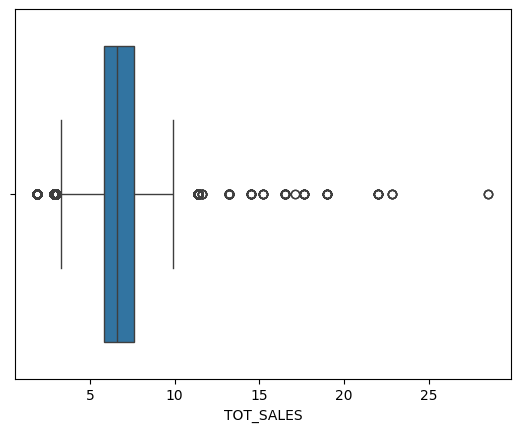

In [ ]:
sns.boxplot(data=transact_data, x='TOT_SALES')

--> No outliers

Searching for missing values

In [ ]:
transact_data.count()

DATE               49770
STORE_NBR          49770
LYLTY_CARD_NBR     49770
TXN_ID             49770
PROD_NBR           49770
PROD_QTY           49770
TOT_SALES          49770
BRAND_NAME         49770
PACK_SIZE_GRAMS    49770
dtype: int64

--> No Missing values

In [ ]:
transact_data['BRAND_NAME'].unique()

array(['Smiths Crinkle Cut  Chips Chicken',
       'Smiths Crinkle Chips Salt   Vinegar', 'Thins Chips Light   Tangy',
       'Thins Chips         Originl saltd', 'Thins Chips Seasonedchicken',
       'Doritos Corn Chips  Original',
       'Cobs Popd Swt Chlli  Sr Cream Chips',
       'Smiths Crinkle Cut  Chips Original', 'Cobs Popd Sea Salt  Chips',
       'Smiths Crinkle Cut  Chips', 'French Fries Potato Chips',
       'Doritos Corn Chips  Cheese Supreme', 'WW Original Corn    Chips',
       'Thins Potato Chips  Hot   Spicy',
       'Cobs Popd Sour Crm   Chives Chips',
       'Doritos Corn Chips  Nacho Cheese', 'WW Original Stacked Chips',
       'Thins Chips Salt    Vinegar',
       'Smiths Crinkle Cut  Chips Barbecue',
       'WW Supreme Cheese   Corn Chips',
       'WW Sour Cream  OnionStacked Chips'], dtype=object)

Merging Transaction and Purchase data

In [ ]:
df=transact_data.merge(purchase_data, how = 'inner')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE_GRAMS,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-05-20,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g,MIDAGE SINGLES/COUPLES,Budget
1,2019-05-16,4,4149,3333,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-17,7,7215,7176,16,1,5.7,Smiths Crinkle Chips Salt Vinegar,330g,MIDAGE SINGLES/COUPLES,Budget
3,2019-05-15,19,19272,16686,44,1,3.3,Thins Chips Light Tangy,175g,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-18,45,45220,41651,22,1,3.3,Thins Chips Originl saltd,175g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
49765,2018-08-24,271,271051,268506,47,2,8.8,Doritos Corn Chips Original,170g,YOUNG SINGLES/COUPLES,Premium
49766,2018-11-04,271,271193,269365,33,2,7.6,Cobs Popd Swt Chlli Sr Cream Chips,110g,YOUNG SINGLES/COUPLES,Premium
49767,2019-05-29,271,271193,269366,75,2,7.6,Cobs Popd Sea Salt Chips,110g,YOUNG SINGLES/COUPLES,Premium
49768,2019-03-25,272,272194,269908,75,2,7.6,Cobs Popd Sea Salt Chips,110g,YOUNG SINGLES/COUPLES,Premium


In [ ]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_QTY            0
TOT_SALES           0
BRAND_NAME          0
PACK_SIZE_GRAMS     0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Printing out Merged Data

In [ ]:
df.to_csv(r'c:\Users\USER\Documents\CODES\Virtual Internship\Quantium\Merged_QVI_transactions.csv', index = False)

*Transactions count by DATE*

In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])
df.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_QTY                     int64
TOT_SALES                  float64
BRAND_NAME                  object
PACK_SIZE_GRAMS             object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [ ]:
Transact_date=df['DATE'].value_counts().reset_index()
Transact_date

,DATE,count
0,2018-12-24,187
1,2018-12-23,184
2,2018-12-19,176
3,2018-07-07,172
4,2018-12-22,172
...,...,...
359,2018-08-17,109
360,2019-05-30,109
361,2019-03-16,108
362,2018-10-18,104


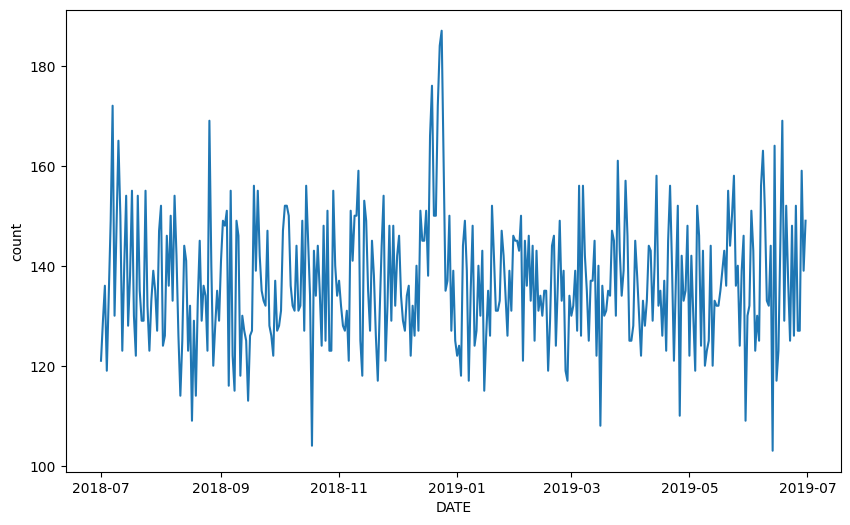

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=Transact_date, y='count', x='DATE')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

--> Most transaction came in the month of December

*Zooming into the month of December*

In [ ]:
december=df[df['DATE'].dt.month==12]
days_december=december['DATE'].dt.day.value_counts().reset_index()
days_december.sort_values('DATE')

,DATE,count
13,1,142
10,2,146
20,3,134
23,4,129
26,5,127
21,6,134
18,7,136
29,8,122
22,9,132
27,10,126


In [ ]:
import matplotlib.ticker as ticker

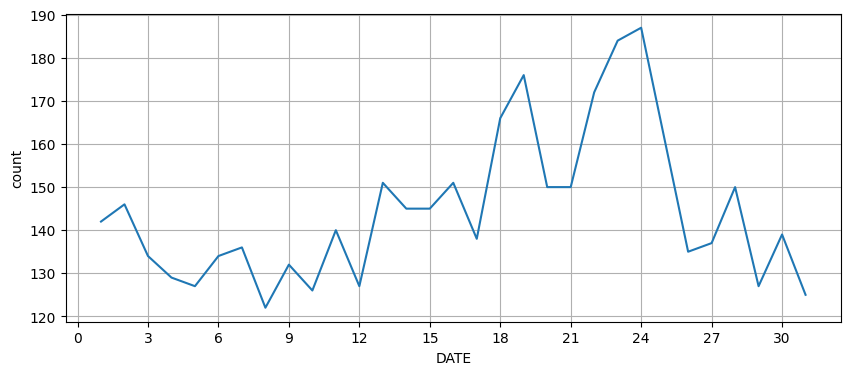

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=days_december, y='count', x='DATE')
plt.ticklabel_format(axis='y', style='plain')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.grid()
plt.show()

--> There was increase in sales in the lead-up to Christmas and there 
were zero sales on Christmas day itself.   This is due to shops being closed on 
Christmas day.

Data Analysis on Customer Segment

*Total Sales by Customer segments*

In [ ]:
segment_sales=df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
segment_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,OLDER FAMILIES,Budget,29390.7
1,YOUNG SINGLES/COUPLES,Mainstream,27136.3
2,RETIREES,Mainstream,26968.7
3,YOUNG FAMILIES,Budget,23895.0
4,OLDER SINGLES/COUPLES,Budget,23674.7
5,OLDER SINGLES/COUPLES,Mainstream,23518.1
6,OLDER SINGLES/COUPLES,Premium,22741.3
7,RETIREES,Budget,19996.7
8,OLDER FAMILIES,Mainstream,18244.2
9,RETIREES,Premium,16383.5


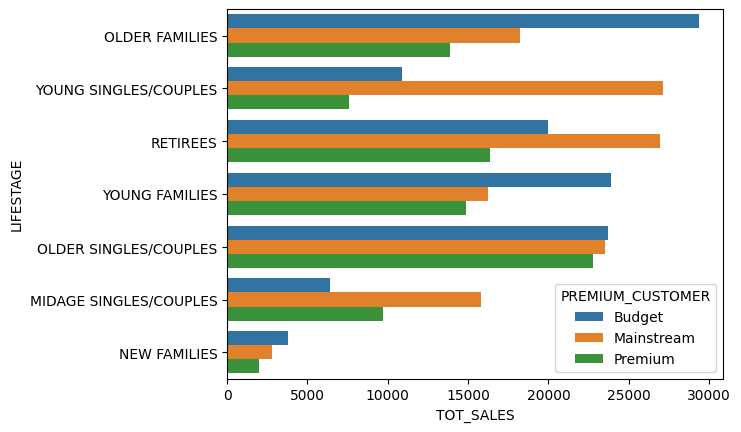

In [ ]:
sns.barplot(data=segment_sales, y='LIFESTAGE', x='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young   
singles/couples, and Mainstream - retirees

*Number of customers by LIFESTAGE and PREMIUM_CUSTOMER*

In [ ]:
segment_count=df[['LIFESTAGE', 'PREMIUM_CUSTOMER']].value_counts().sort_values(ascending=False).reset_index()
segment_count

,LIFESTAGE,PREMIUM_CUSTOMER,count
0,OLDER FAMILIES,Budget,4335
1,RETIREES,Mainstream,3997
2,YOUNG SINGLES/COUPLES,Mainstream,3887
3,YOUNG FAMILIES,Budget,3543
4,OLDER SINGLES/COUPLES,Mainstream,3479
5,OLDER SINGLES/COUPLES,Budget,3471
6,OLDER SINGLES/COUPLES,Premium,3318
7,RETIREES,Budget,2927
8,OLDER FAMILIES,Mainstream,2689
9,YOUNG FAMILIES,Mainstream,2424


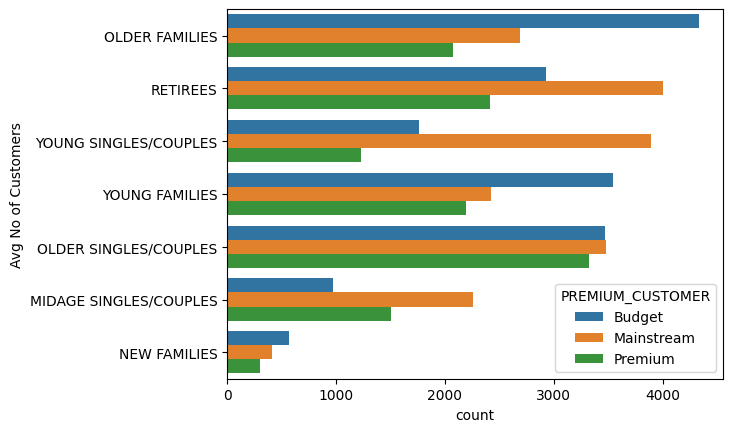

In [ ]:
sns.barplot(data=segment_count, y='LIFESTAGE', x='count', hue='PREMIUM_CUSTOMER')
plt.ylabel('Avg No of Customers')
plt.ticklabel_format(axis='x', style='plain')
plt.show()

-->  There are more Budget - Older families, Mainstream - young singles/couples   and Mainstream - retirees who buy
 chips

*Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER*

In [ ]:
segment_avg_qty=df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().sort_values(ascending=False).reset_index()
segment_avg_qty

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,OLDER FAMILIES,Premium,1.949349
1,OLDER FAMILIES,Budget,1.944406
2,OLDER FAMILIES,Mainstream,1.943473
3,YOUNG FAMILIES,Mainstream,1.941007
4,YOUNG FAMILIES,Premium,1.937073
5,YOUNG FAMILIES,Budget,1.930850
6,OLDER SINGLES/COUPLES,Premium,1.918324
7,OLDER SINGLES/COUPLES,Mainstream,1.917792
8,OLDER SINGLES/COUPLES,Budget,1.909536
9,MIDAGE SINGLES/COUPLES,Mainstream,1.907801


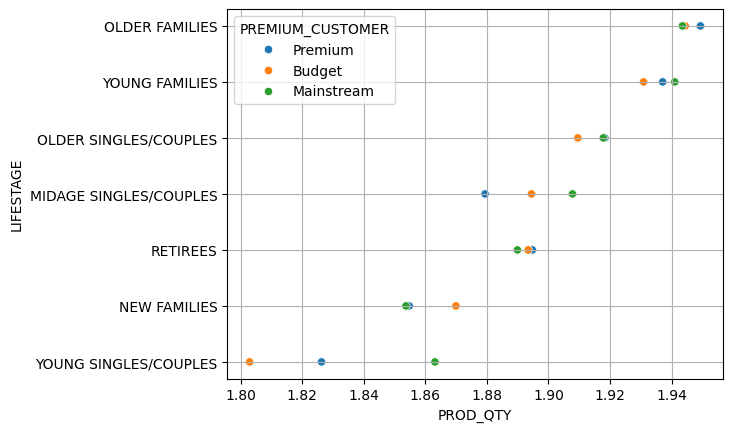

In [ ]:
sns.scatterplot(data=segment_avg_qty, y='LIFESTAGE', x='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.grid()
plt.show()

-->  Older families and young families in general buy more chips per customer

*Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER*

In [ ]:
#creating a column for PRICE
df['PRICE']=df['TOT_SALES']/df['PROD_QTY']
df['PRICE']

0        1.45
1        5.70
2        5.70
3        3.30
4        3.30
         ... 
49765    4.40
49766    3.80
49767    3.80
49768    3.80
49769    3.30
Name: PRICE, Length: 49770, dtype: float64

In [ ]:
segment_avg_price=df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PRICE'].mean().sort_values(ascending=False).reset_index()
segment_avg_price

,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,YOUNG SINGLES/COUPLES,Mainstream,3.741266
1,MIDAGE SINGLES/COUPLES,Mainstream,3.673715
2,RETIREES,Budget,3.599983
3,NEW FAMILIES,Mainstream,3.587050
4,NEW FAMILIES,Premium,3.582508
5,RETIREES,Premium,3.580737
6,NEW FAMILIES,Budget,3.576450
7,OLDER SINGLES/COUPLES,Premium,3.569259
8,OLDER SINGLES/COUPLES,Budget,3.562633
9,RETIREES,Mainstream,3.560395


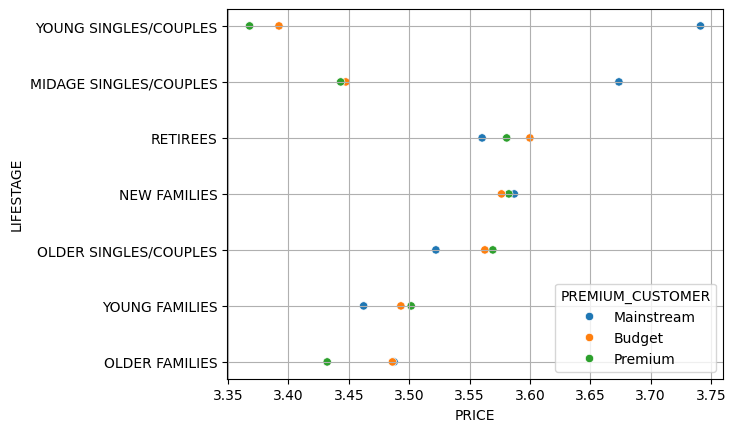

In [ ]:
sns.scatterplot(data=segment_avg_price, y='LIFESTAGE', x='PRICE', hue='PREMIUM_CUSTOMER')
plt.grid()
plt.show()

Performing a t-test to see if the difference btw Mainstream and Premium/Budget is significant

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
group_a=segment_avg_price[segment_avg_price['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])&(segment_avg_price['PREMIUM_CUSTOMER']=='Mainstream')]['PRICE']
group_b=segment_avg_price[segment_avg_price['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])&(segment_avg_price['PREMIUM_CUSTOMER'].isin(['Premium', 'Budget']))]['PRICE']

In [ ]:
a,pvalue=ttest_ind(group_a, group_b)

if pvalue > 0.5:
    print('The unit price for MAINSTREAM, young and mid-age singles and couples ARE NOT significantly higher than that of BUDGET or PREMIUM...!')
else:
    print('The unit price for MAINSTREAM, young and mid-age singles and couples ARE significantly higher than that of BUDGET or PREMIUM...!')

The unit price for MAINSTREAM, young and mid-age singles and couples ARE significantly higher than that of BUDGET or PREMIUM...!


--> Mainstream midage and young singles and couples are more willing to pay more per   
packet of chips compared to their budget and premium counterparts.  
This is also supported by there being fewer premium midage and young singles and   
couples buying chips compared to their mainstream counterparts.

*What brands are these top Mainstream-Customers likely to buy*

In [ ]:
df[['BRAND_NAME', 'PRODUCT']]=df['BRAND_NAME'].str.split(' ', n=1, expand=True)
df[['BRAND_NAME', 'PRODUCT']]

,BRAND_NAME,PRODUCT
0,Smiths,Crinkle Cut Chips Chicken
1,Smiths,Crinkle Chips Salt Vinegar
2,Smiths,Crinkle Chips Salt Vinegar
3,Thins,Chips Light Tangy
4,Thins,Chips Originl saltd
...,...,...
49765,Doritos,Corn Chips Original
49766,Cobs,Popd Swt Chlli Sr Cream Chips
49767,Cobs,Popd Sea Salt Chips
49768,Cobs,Popd Sea Salt Chips


In [ ]:
brand=df[(df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')&(df['PREMIUM_CUSTOMER']=='Mainstream')]
brand_name=(brand.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['BRAND_NAME'].value_counts(normalize=True)*100).round(3).sort_values(ascending=False).reset_index()
brand_name

,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,proportion
0,YOUNG SINGLES/COUPLES,Mainstream,Thins,29.997
1,YOUNG SINGLES/COUPLES,Mainstream,Doritos,23.823
2,YOUNG SINGLES/COUPLES,Mainstream,Cobs,22.228
3,YOUNG SINGLES/COUPLES,Mainstream,Smiths,15.513
4,YOUNG SINGLES/COUPLES,Mainstream,WW,6.432
5,YOUNG SINGLES/COUPLES,Mainstream,French,2.007


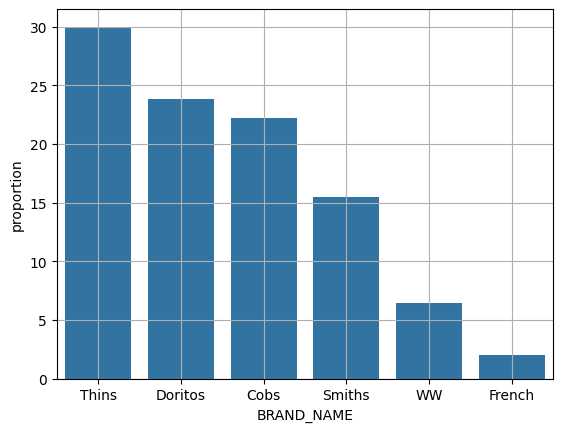

In [ ]:
sns.barplot(data=brand_name, x='BRAND_NAME', y='proportion')
plt.ticklabel_format(axis='y', style='plain')
plt.grid()
plt.show()

--> The THINS and DORITOS brands was the most sort after brand of chips

*Preferred pack size compared to the rest of the population*

In [ ]:
packs=(brand.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PACK_SIZE_GRAMS'].value_counts()).round(3).sort_values(ascending=False).reset_index()
packs

,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE_GRAMS,count
0,YOUNG SINGLES/COUPLES,Mainstream,175g,1244
1,YOUNG SINGLES/COUPLES,Mainstream,170g,1139
2,YOUNG SINGLES/COUPLES,Mainstream,110g,864
3,YOUNG SINGLES/COUPLES,Mainstream,330g,314
4,YOUNG SINGLES/COUPLES,Mainstream,160g,128
5,YOUNG SINGLES/COUPLES,Mainstream,200g,122
6,YOUNG SINGLES/COUPLES,Mainstream,&Onion170g,76


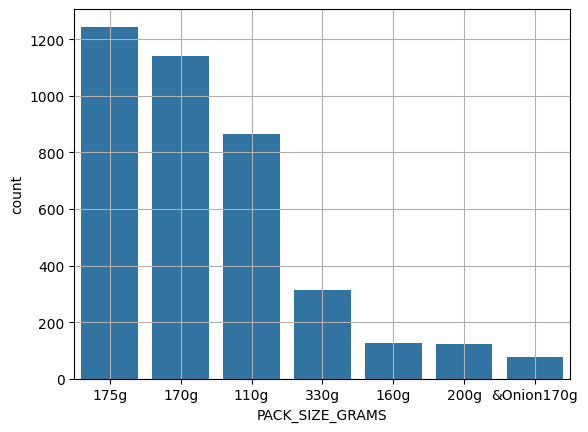

In [ ]:
sns.barplot(data=packs, x='PACK_SIZE_GRAMS', y='count')
plt.ticklabel_format(axis='y', style='plain')
plt.grid()
plt.show()

--> The most Preferred Pack size for Mainstream-YOUNG SINGLES/COUPLES is 175g followed by 170g